In [193]:
import pandas as pd
from collections import Counter
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [184]:
def calculate_distance(p, q):
    """ Calculate Euclidean distance between two points."""
    distance =(\
               ((float(p[0]) - float(q[0])) ** 2) + \
               ((float(p[1]) - float(q[1])) ** 2)\
              ) ** 0.5
    return distance

In [185]:
p = [1,1]
q = [2,2]
calculate_distance(p,q)

1.4142135623730951

In [186]:


def neighbor_vote(labels):
    """ Get the majority label from k neighbors."""
    data = Counter(labels)
      # Returns all unique items and their counts
    vote = data.most_common(1)
    # Is it possible to have a tie? How would you handle that?
    return vote

In [210]:
import pandas as pd
def knn_classifier(labeled_points, new_point, k):
    points_list = []
    for i in labeled_points:
        label = i[0]
        x = i[1]
        y = i[2]
        from_pt = [x , y]
        distance = calculate_distance(from_pt,new_point)
        point = [label, distance]
        points_list.append(point)
    """ Given classified points and one new point, return a prediction based on the votes of k neighbors."""
    df = pd.DataFrame(points_list)
    df = df.sort([1])
    label_list = df[0].values.tolist()
    label_list = label_list[0:k]
    prediction = neighbor_vote(label_list)
    prediction = prediction[0][0]
    return prediction




In [322]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

# import data
iris = datasets.load_iris()
X = iris.data[:100, :2]  # use the first two features and just the first two classes.
y = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Split 70/30 into initial data and new points to classify
training_df = pd.DataFrame({'feature1':X_train[:,0],'feature2':X_train[:,1],'class':y_train})
test_df = pd.DataFrame({'feature1':X_test[:,0],'feature2':X_test[:,1],'class':y_test})

adding = [[1,5,4],[1,5,4],[1,5,4],[1,5,4],[1,5,4],[1,5,4],[1,5,4],[1,5,4],[1,5,4],[1,5,4],[1,5,4],[1,5,4],\
          [1,4.5,3.5],[1,4.5,3.5],[1,4.5,3.5],[1,4.5,3.5],[1,4.5,3.5],[1,4.5,3.5],[1,4.5,3.5],[1,4.5,3.5],[1,4.5,3.5]]
adding_df = pd.DataFrame(adding)
adding_df = adding_df.rename(columns={0:'class',1:'feature1', 2:'feature2'})

#training_df = pd.concat([training_df, adding_df], axis=0)

labeled_points = training_df.values.tolist()

test_df_list = test_df.values.tolist()

k = 1
prediction = []
for i in test_df_list:
    new_point = [i[1],i[2]]
    prediction.append(knn_classifier(labeled_points, new_point, k))
print prediction


[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]


/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [323]:
""" Iteratively classify new points in test_df, based on the labeled points in training_df, and track your accuracy."""

' Iteratively classify new points in test_df, based on the labeled points in training_df, and track your accuracy.'

In [324]:
test_pred = pd.DataFrame(prediction)
test_df = pd.concat([test_df,test_pred], axis=1)
test_df = test_df.rename(columns={0: 'pred'})

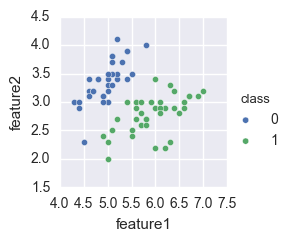

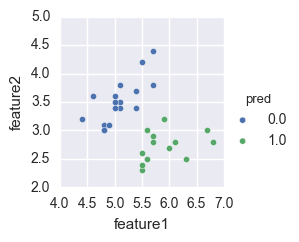

In [325]:


""" BONUS: plot the labeled points and an example of a new point being classified."""
sns.pairplot(training_df, x_vars='feature1', y_vars='feature2', hue='class')
sns.pairplot(test_df, x_vars='feature1', y_vars='feature2', hue='pred')